In [2]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

In [3]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [6]:
sn2 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl2/output', 50, combineFiles=True)
sn3 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)
sn4 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4/output', 50, combineFiles=True)


In [13]:
print(np.sum(sn.part0.sfr))

17.625132


In [7]:
def compute_KS(sn, dx=0.5):

    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    pos = sn.part0.pos.value - center
    sfr = sn.part0.sfr
    mass = sn.part0.mass.value

    Sigma_gas, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], 1E10*mass, 
                                             statistic='sum', bins=np.arange(-8, 8, dx))
    Sigma_gas /= (1000*dx)**2

    Sigma_sfr, _, _, _ = binned_statistic_2d(pos[:,0], pos[:,1], sfr, 
                                             statistic='sum', bins=np.arange(-8, 8, dx))
    Sigma_sfr /= dx**2

    # Sigma_gas = Sigma_gas.flatten()
    # Sigma_sfr = Sigma_sfr.flatten()
    
    return Sigma_gas, Sigma_sfr
    

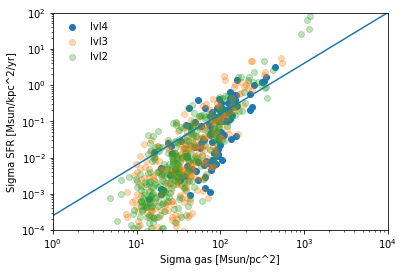

In [8]:
Sigma_gas4, Sigma_sfr4 = compute_KS(sn4, dx=0.5)
Sigma_gas3, Sigma_sfr3 = compute_KS(sn3, dx=0.5)
Sigma_gas2, Sigma_sfr2 = compute_KS(sn2, dx=0.5)

plt.scatter(Sigma_gas4.flatten(), Sigma_sfr4.flatten(), label='lvl4')
plt.scatter(Sigma_gas3.flatten(), Sigma_sfr3.flatten(), alpha=0.3, label='lvl3')
plt.scatter(Sigma_gas2.flatten(), Sigma_sfr2.flatten(), alpha=0.3, label='lvl2')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1E4)
plt.ylim(1E-4, 1E2)

xKS = np.linspace(1, 1E4, 10000)
yKS = 2.5E-4 * xKS**1.4
plt.plot(xKS, yKS)
plt.xlabel('Sigma gas [Msun/pc^2]')
plt.ylabel('Sigma SFR [Msun/kpc^2/yr]')
plt.legend(frameon=False)


In [ ]:
key = np.logical